In [1]:
# We want to make a chloropleth map (geopandas makes it easy to create Choropleth maps 
# Which are maps where the color of each shape is based on the value of a variable)
# Here, based on WBGT
# We can use geopandas for this: provides a high-level interface to the matplotlib library for making maps
# We'll simply use plot() on a geodataframe
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

In [ ]:
# Begin by generating a Germany map with the most important cities.
# Make sure you read postal codes "plz" as strings, otherwise 
# the postal code 01110 will be parsed as the number 1110. 
# Source: https://juanitorduz.github.io/germany_plots/ and www.suche-postleitzahl.org/downloads
# These data contain shapefile with germany postal codes polygons (needed to plot borders of postal code)
# Later, we'll merge our WBGT data by postal code with these data
plz_shape_df = gpd.read_file('/Users/sarah.pirenne/Downloads/MDA-Singapore-main/plz-gebiete.shp', dtype={'plz': str})
print(plz_shape_df)

In [ ]:
# First, we start by plotting a simple map of Germany with its biggest cities
plt.rcParams['figure.figsize'] = [16, 11]
# Get lat and lng of Germany's main cities
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);


In [ ]:
# Now, we plot a map with different regions in Germany
# Regions are now defined as the first digit of the postal code
# Create region feature
plz_shape_df = plz_shape_df \
    .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))
fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-Postal Codes Areas', 
    aspect=1.3,
    facecolor='white'
);


In [5]:
# Now we can map every postal code to the corresponding region
# Load data with postal code to city and bundesland mapping
plz_region_df = pd.read_csv(
    '/Users/sarah.pirenne/Downloads/MDA-Singapore-main/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

print(plz_region_df)

               ort    plz           bundesland
0             Aach  78267    Baden-Württemberg
1             Aach  54298      Rheinland-Pfalz
2           Aachen  52062  Nordrhein-Westfalen
3           Aachen  52064  Nordrhein-Westfalen
4           Aachen  52066  Nordrhein-Westfalen
...            ...    ...                  ...
12878   Zwiefalten  88529    Baden-Württemberg
12879      Zwiesel  94227               Bayern
12880  Zwingenberg  69439    Baden-Württemberg
12881  Zwingenberg  64673               Hessen
12882      Zwönitz  08297              Sachsen

[12883 rows x 3 columns]


In [6]:
# Merge postal code geometry data with postal code and bundesland data by postal code (plz)
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

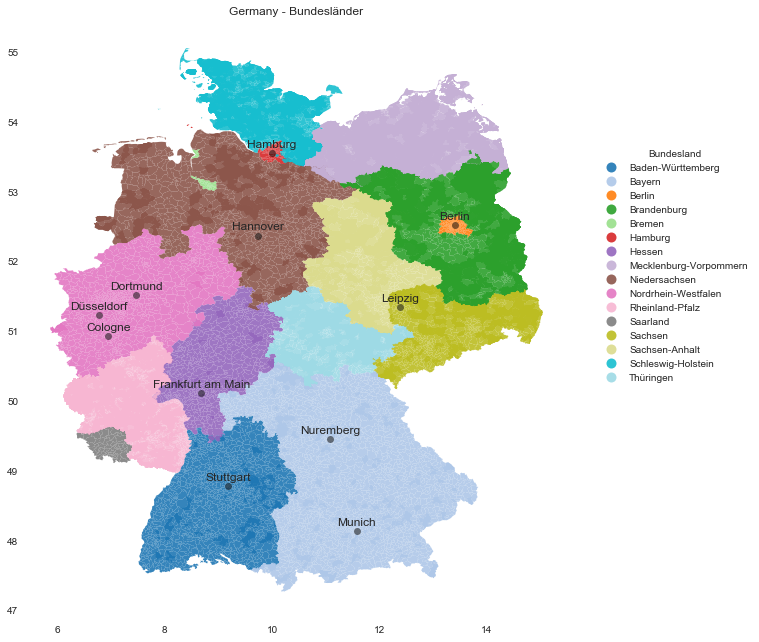

In [7]:
# Generate bundesland map with merged data
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax,
    column='bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Bundesländer', 
    aspect=1.3, 
    facecolor='white'
);

In [7]:
# Load data with station name, plz and longitude and latitude of station
location = pd.read_excel('/Users/sarah.pirenne/Downloads/MDA-Singapore-main/location_germany.xlsx', converters={'plz': str})
# Rename columns
location.columns = ['station', 'longitude', 'latitude', 'plz']
print(location)

                          station  longitude  latitude    plz
0              DE ANGERMUNDE 3992    13.5935   53.0159  16278
1                  DE ARTERN 4185    11.1735   51.2232  06556
2                 DE AUGSBURG 494    10.5635   48.2535  86150
3             DE BADHERSFELD 4217     9.4418   50.5111  36251
4            DE BADKISSINGEN 4285    10.0449   50.1332  97688
..                            ...        ...       ...    ...
104            DE WIESENBURG 4766    12.2736   52.0719  14827
105            DE WITTENBERG 4776    12.3847   51.5325  06886
106               DE WURZBURG 489     9.5732   49.4617  97070
107  DE ZINNWALD-GEORGENFELD 4801    13.4511   50.4358  01773
108               DE ZUGSPITZE 58    10.5912   47.2519  82475

[109 rows x 4 columns]


In [8]:
# Load data with WBGT per day
WBGT = pd.read_excel('/Users/sarah.pirenne/Downloads/MDA-Singapore-main/wet_bulb_map_germany.xlsx')
WBGT = WBGT.transpose() # Transpose to have station names in one column
# Rename columns to dates
WBGT.columns = WBGT.iloc[0] # name of columns are row 0 of WBGT
WBGT = WBGT.iloc[1: , :] # Omit row 0 from data: keep all rows from row 1 on
WBGT.index.name = 'station' # First column should be called 'station'
print(WBGT)

Unnamed: 0                   1996-04-01 1996-04-02 1996-04-03 1996-04-04  \
station                                                                    
DE ARTERN 4185                 -3.27118   -1.59861  -0.978978   0.749066   
DE AUGSBURG 494               -0.593827   -1.10508   -2.82309   -3.25361   
DE BADHERSFELD 4217            -3.24515   -3.20901   -1.36461  -0.664674   
DE BADKISSINGEN 4285            -1.4817    -2.1453   -1.87684   -1.03132   
DE BADMARIENBERG 4390          -3.90745    -3.9301   -1.80213   -1.56141   
...                                 ...        ...        ...        ...   
DE WIESENBURG 4766             -3.70929    -2.0326  -0.780039    0.72889   
DE WITTENBERG 4776             -3.11483   -1.61459   -1.27235   0.654105   
DE WURZBURG 489                -0.71617  -0.918207   -1.65353   -2.64736   
DE ZINNWALD-GEORGENFELD 4801   -6.47054   -4.98368   -5.35782   -3.35779   
DE ZUGSPITZE 58                -11.6914   -13.1514   -14.1311   -9.66159   

Unnamed: 0 

In [9]:
# Merge dataframes location and WBGT
location_WBGT = pd.merge(location, WBGT, left_on = 'station', right_on = 'station')
print(location_WBGT)

                          station  longitude  latitude    plz 1996-04-01  \
0                  DE ARTERN 4185    11.1735   51.2232  06556   -3.27118   
1                 DE AUGSBURG 494    10.5635   48.2535  86150  -0.593827   
2             DE BADHERSFELD 4217     9.4418   50.5111  36251   -3.24515   
3            DE BADKISSINGEN 4285    10.0449   50.1332  97688    -1.4817   
4           DE BADMARIENBERG 4390     7.5734   50.3947  56470   -3.90745   
..                            ...        ...       ...    ...        ...   
103            DE WIESENBURG 4766    12.2736   52.0719  14827   -3.70929   
104            DE WITTENBERG 4776    12.3847   51.5325  06886   -3.11483   
105               DE WURZBURG 489     9.5732   49.4617  97070   -0.71617   
106  DE ZINNWALD-GEORGENFELD 4801    13.4511   50.4358  01773   -6.47054   
107               DE ZUGSPITZE 58    10.5912   47.2519  82475   -11.6914   

    1996-04-02 1996-04-03 1996-04-04 1996-04-05 1996-04-06  ... 2019-09-21  \
0     -1.

In [10]:
# Merge all data: location_WBGT with germany by plz
germany_df = pd.merge(
     left=germany_df, 
     right=location_WBGT, 
     on='plz', 
     how='left'
)

print(germany_df)

         plz                                           geometry first_dig_plz  \
0      52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
1      52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
2      47559  POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...             4   
3      52525  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...             5   
4      52525  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...             5   
...      ...                                                ...           ...   
15303  02899  POLYGON ((14.85296 51.06854, 14.85449 51.06859...             0   
15304  02929  POLYGON ((14.85491 51.32895, 14.85608 51.33004...             0   
15305  02827  POLYGON ((14.91168 51.14243, 14.91571 51.14571...             0   
15306  02828  POLYGON ((14.93413 51.16084, 14.93451 51.16123...             0   
15307  02826  POLYGON ((14.95374 51.14703, 14.95393 51.14814...             0   

                           

In [11]:
# We need average WBGT per Bundesland to make a map which covers entire Germany and not only the station postcodes
# Let's do this for our first and last measurement: April 1st 1996 and September 30th 2019
# For illustration purposes
germany_df[['1996-04-01','2019-09-30']] = germany_df[['1996-04-01','2019-09-30']].apply(pd.to_numeric) # First we need to make WBGT numerical
grouped=germany_df[['1996-04-01','2019-09-30']].groupby(germany_df['bundesland'])
WBGT_19962019_bundesland = grouped.mean()
print(WBGT_19962019_bundesland)

                        1996-04-01  2019-09-30
bundesland                                    
Baden-Württemberg        -1.916836   11.647947
Bayern                   -2.581302   12.083499
Berlin                   -2.480428   15.057055
Brandenburg              -1.732512   13.123052
Bremen                   -2.447580   14.060261
Hamburg                  -3.406482   11.013896
Hessen                   -2.463042   10.959110
Mecklenburg-Vorpommern   -2.888745   11.253359
Niedersachsen            -2.806810   12.462029
Nordrhein-Westfalen      -3.209524   11.236387
Rheinland-Pfalz          -2.316133   11.069774
Saarland                 -0.396319   10.576963
Sachsen                  -3.637654   13.217398
Sachsen-Anhalt           -4.092196   12.403642
Schleswig-Holstein       -1.666387   11.449512
Thüringen                -4.292147   11.596492


In [12]:
# Merge all data: average WBGT per bundesland with germany by bundesland
germany_df = pd.merge(
    left=germany_df, 
    right=WBGT_19962019_bundesland, 
    on='bundesland', 
    how='left'
)
germany_df.head()

plz                                           geometry first_dig_plz  \
0  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
1  52538  POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...             5   
2  47559  POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...             4   
3  52525  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...             5   
4  52525  POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...             5   

          ort           bundesland station  longitude  latitude  1996-04-01_x  \
0     Gangelt  Nordrhein-Westfalen     NaN        NaN       NaN           NaN   
1    Selfkant  Nordrhein-Westfalen     NaN        NaN       NaN           NaN   
2  Kranenburg  Nordrhein-Westfalen     NaN        NaN       NaN           NaN   
3   Heinsberg  Nordrhein-Westfalen     NaN        NaN       NaN           NaN   
4  Waldfeucht  Nordrhein-Westfalen     NaN        NaN       NaN           NaN   

  1996-04-02  ... 2019-09-23 2019-09-24 2019-09-25 2019-09-26 2019-09-27  \
0        NaN  ...        NaN        NaN        NaN        NaN        NaN   
1        NaN  ...        NaN        NaN        NaN        NaN        NaN   
2        NaN  ...        NaN        NaN        NaN        NaN        NaN   
3        NaN  ...        NaN        NaN        NaN        NaN        NaN   
4        NaN  ...        NaN        NaN        NaN        NaN        NaN   

  2019-09-28 2019-09-29 2019-09-30_x 1996-04-01_y 2019-09-30_y  
0        NaN        NaN          NaN    -3.209524    11.236387  
1        NaN        NaN          NaN    -3.209524    11.236387  
2        NaN        NaN          NaN    -3.209524    11.236387  
3        NaN        NaN          NaN    -3.209524    11.236387  
4        NaN        NaN          NaN    -3.209524    11.236387  

[5 rows x 4402 columns]

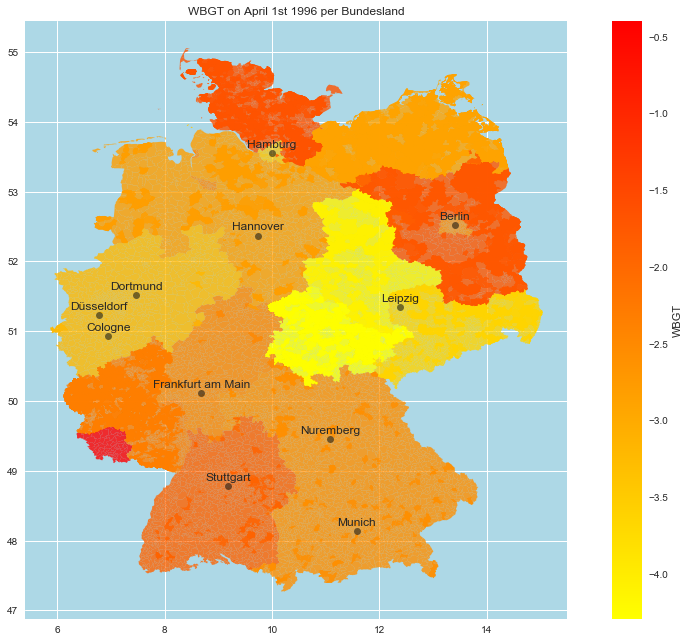

In [14]:
fig , ax = plt.subplots() 

germany_df.plot(
    ax=ax, 
    column='1996-04-01_y', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8, 
    legend_kwds={'label': "WBGT"}
)
for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='WBGT on April 1st 1996 per Bundesland', 
    aspect=1.3, 
    facecolor='lightblue'
);

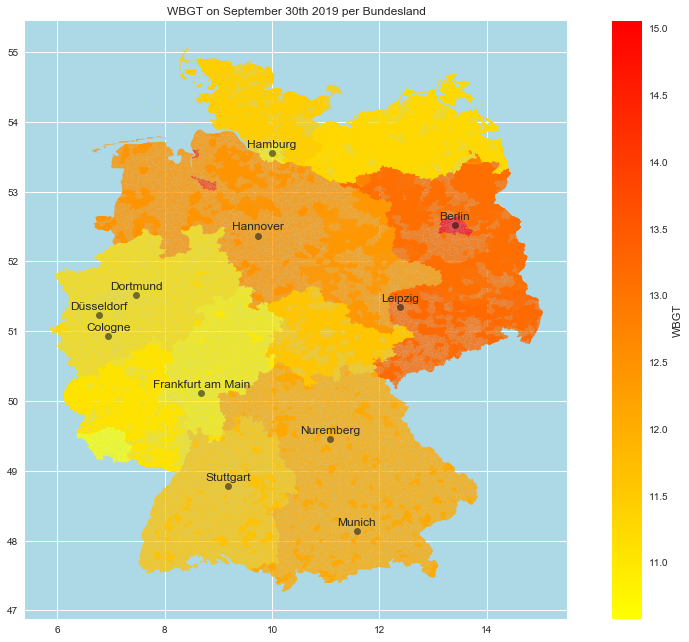

In [15]:
fig , ax = plt.subplots() 

germany_df.plot(
    ax=ax, 
    column='2019-09-30_y', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8, 
    legend_kwds={'label': "WBGT"}
)
for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='WBGT on September 30th 2019 per Bundesland', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [13]:
# Now, we add the weather stations we used for calculating the WBGT to the map
stations = pd.DataFrame.dropna(pd.DataFrame.drop_duplicates(germany_df.iloc[:,5:8])) # Make dataframe with station, long and lat
stations = stations \
   .assign(station = lambda x: x['station'].str.slice(start=3, stop=30)) # Omit "DE" from station name
stations.iloc[:,1:3] = stations.iloc[:,1:3].apply(pd.to_numeric) # Make long and lat numeric
print(stations)

# Get dictionary with lat and long of our weather stations
stations_dictionary = stations.to_dict(orient='index')

                           station  longitude  latitude
627          TRIER-PETRISBERG 2760     6.3933   49.4457
700                     BERUS 4634     6.4116   49.1555
1015                DUSSELDORF 479     6.4612   51.1749
1028         NURBURG-BARWEILER 485     6.5213   50.2139
1207               DEUSELBACH 4970     7.0320   49.4547
...                            ...        ...       ...
15135  LICHTENHAIN-MITTELNDORF 435    14.1239   50.5622
15185                  GRUNOW 4171    13.5609   53.1900
15193                 COTTBUS 4014    14.1906   51.4639
15216               MANSCHNOW 4386    14.3251   52.3253
15307                  GORLITZ 484    14.5711   51.0947

[107 rows x 3 columns]


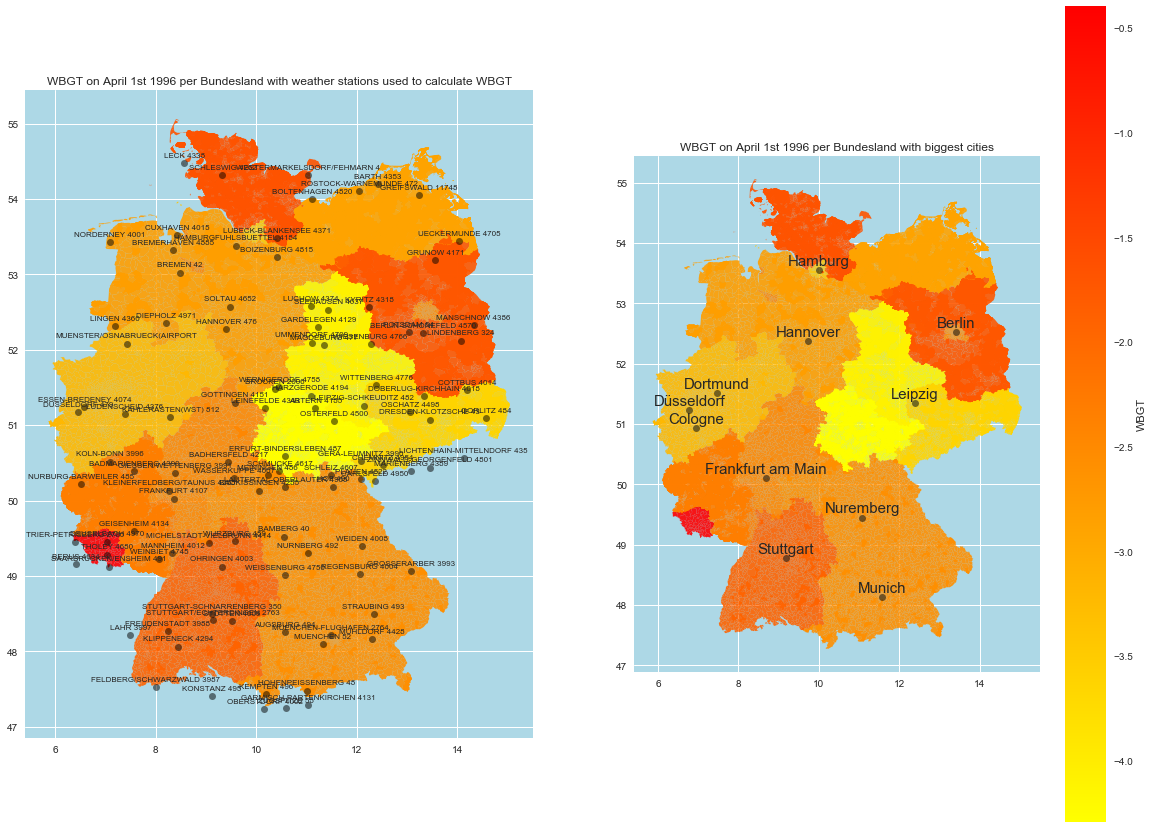

In [14]:
plt.rcParams['figure.figsize'] = [20, 15]
fig, (ax1,ax2) = plt.subplots(1,2) # Plot the maps with biggest cities and our weather stations next to eachother 

germany_df.plot(
    ax=ax1, 
    column='1996-04-01_y', 
    categorical=False, 
    legend=False, 
    cmap='autumn_r',
    alpha=0.9, 
    legend_kwds={'label': "WBGT"}
)

for c in stations_dictionary.keys():

    ax1.text(
        x=stations_dictionary[c]['longitude'], 
        y=stations_dictionary[c]['latitude'] + 0.08, 
        s=stations_dictionary[c]['station'], 
        fontsize=8,
        ha='center', 
    )

    ax1.plot(
        stations_dictionary[c]['longitude'], 
        stations_dictionary[c]['latitude'], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax1.set(
    title='WBGT on April 1st 1996 per Bundesland with weather stations used to calculate WBGT', 
    aspect=1.5, 
    facecolor='lightblue'
);


germany_df.plot(
    ax=ax2, 
    column='1996-04-01_y', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.9, 
    legend_kwds={'label': "WBGT"}
)
for c in top_cities.keys():

    ax2.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=15,
        ha='center', 
    )

    ax2.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax2.set(
    title='WBGT on April 1st 1996 per Bundesland with biggest cities', 
    aspect=1.5, 
    facecolor='lightblue'
);



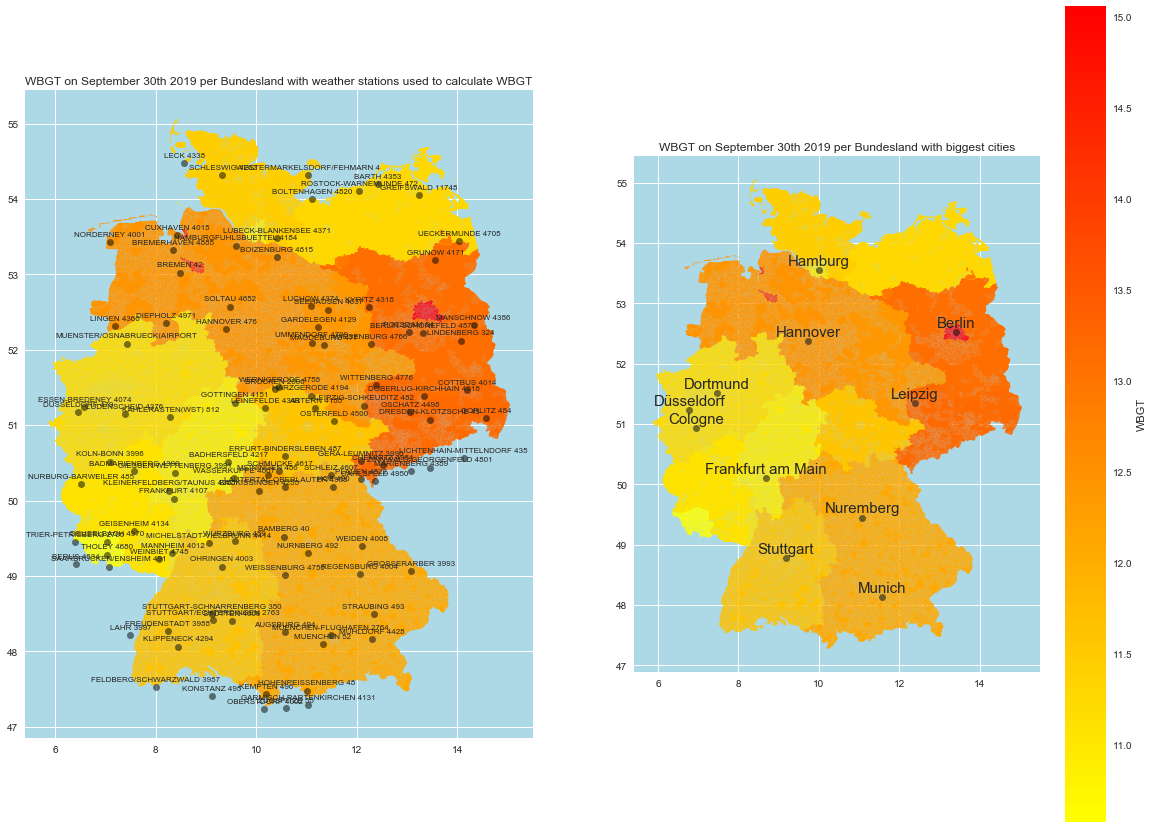

In [15]:
plt.rcParams['figure.figsize'] = [20, 15]
fig, (ax1,ax2) = plt.subplots(1,2) # Plot the maps with biggest cities and our weather stations next to eachother 

germany_df.plot(
    ax=ax1, 
    column='2019-09-30_y', 
    categorical=False, 
    legend=False, 
    cmap='autumn_r',
    alpha=0.9, 
    legend_kwds={'label': "WBGT"}
)

for c in stations_dictionary.keys():

    ax1.text(
        x=stations_dictionary[c]['longitude'], 
        y=stations_dictionary[c]['latitude'] + 0.08, 
        s=stations_dictionary[c]['station'], 
        fontsize=8,
        ha='center', 
    )

    ax1.plot(
        stations_dictionary[c]['longitude'], 
        stations_dictionary[c]['latitude'], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax1.set(
    title='WBGT on September 30th 2019 per Bundesland with weather stations used to calculate WBGT', 
    aspect=1.5, 
    facecolor='lightblue'
);


germany_df.plot(
    ax=ax2, 
    column='2019-09-30_y', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.9, 
    legend_kwds={'label': "WBGT"}
)
for c in top_cities.keys():

    ax2.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=15,
        ha='center', 
    )

    ax2.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax2.set(
    title='WBGT on September 30th 2019 per Bundesland with biggest cities', 
    aspect=1.5, 
    facecolor='lightblue'
);

In [19]:
# Let's make this interactive (zoomable; on real map) by using mplleaflet
import mplleaflet # mplleaflet is a Python library that converts a matplotlib plot into a webpage containing a pannable, zoomable Leaflet map
from IPython.display import IFrame

fig, ax = plt.subplots() 

germany_df.plot(
    ax=ax, 
    column='2019-09-30_y', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.9
)

for c in stations_dictionary.keys():

    ax.text(
        x=stations_dictionary[c]['longitude'], 
        y=stations_dictionary[c]['latitude'] + 0.08, 
        s=stations_dictionary[c]['station'], 
        fontsize=8,
        ha='center', 
    )

    ax.plot(
        stations_dictionary[c]['longitude'], 
        stations_dictionary[c]['latitude'], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='WBGT on September 30th 2019 per Bundesland with weather stations used to calculate WBGT', 
    aspect=1.5, 
    facecolor='lightblue'
);

mplleaflet.show()

In [16]:
# Let's make it interactive using hvplot: if we hover over a bundesland we'll get the average WBGT for that day
import hvplot.pandas # Encountered problem importing hvplot: incompatible with Bokeh... 

germany_df.hvplot(
    ax=ax, 
    column='2019-09-30_y', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.9
)

for c in stations_dictionary.keys():

    ax.text(
        x=stations_dictionary[c]['longitude'], 
        y=stations_dictionary[c]['latitude'] + 0.08, 
        s=stations_dictionary[c]['station'], 
        fontsize=8,
        ha='center', 
    )

    ax.plot(
        stations_dictionary[c]['longitude'], 
        stations_dictionary[c]['latitude'], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='WBGT on September 30th 2019 per Bundesland with weather stations used to calculate WBGT', 
    aspect=1.5, 
    facecolor='lightblue'
);

ImportError: In order to use geo-related features the geoviews library must be available. It can be installed with:
  conda install -c pyviz geoviews

ImportError: cannot import name '_Unset' from 'bokeh.settings' (/opt/anaconda3/lib/python3.7/site-packages/bokeh/settings.py)

{'Berlin': (13.404954, 52.520008), 'Cologne': (6.953101, 50.935173), 'Düsseldorf': (6.782048, 51.227144), 'Frankfurt am Main': (8.682127, 50.110924), 'Hamburg': (9.993682, 53.551086), 'Leipzig': (12.387772, 51.343479), 'Munich': (11.576124, 48.137154), 'Dortmund': (7.468554, 51.5134), 'Stuttgart': (9.181332, 48.777128), 'Nuremberg': (11.077438, 49.44982), 'Hannover': (9.73322, 52.37052)}


{'station': {0: nan, 627: 'TRIER-PETRISBERG 2760', 700: 'BERUS 4634', 1015: 'DUSSELDORF 479', 1028: 'NURBURG-BARWEILER 485', 1207: 'DEUSELBACH 4970', 1236: 'THOLEY 4680', 1283: 'ESSEN-BREDENEY 4074', 1688: 'SAARBRUCKEN/ENSHEIM 491', 1750: 'KOLN-BONN 3996', 1869: 'NORDERNEY 4001', 1933: 'LINGEN 4360', 2941: 'MUENSTER/OSNABRUECK(AIRPORT', 3230: 'LUDENSCHEID 4376', 4131: 'LAHR 3997', 4534: 'GEISENHEIM 4134', 4615: 'BADMARIENBERG 4390', 4797: 'FELDBERG/SCHWARZWALD 3987', 5071: 'WEINBIET 4745', 5293: 'FREUDENSTADT 3988', 5370: 'DIEPHOLZ 4971', 5522: 'KLEINERFELDBERG/TAUNUS 4288', 5557: 'KAHLERASTEN(WST) 812', 5578: 'MANNHEIM 4012', 5706: 'BREMERHAVEN 4885', 5833: 'GIESSEN/WETTENBERG 3991', 5959: 'FRANKFURT 4107', 5978: 'CUXHAVEN 4015', 6018: 'KLIPPENECK 4294', 6187: 'BREMEN 42', 6426: 'LECK 4338', 6441: 'MICHELSTADT-VIELBRUNN 4414', 6889: 'KONSTANZ 495', 6968: 'STUTTGART/ECHTERDINGEN 2763', 6969: 'STUTTGART-SCHNARRENBERG 350', 7495: 'OHRINGEN 4003', 7704: 'SCHLESWIG 4262', 7779: 'BADHERSFEL

14620    13.3157
Name: longitude, dtype: float64

Int64Index([    0,   627,   700,  1015,  1028,  1207,  1236,  1283,  1688,
             1750,
            ...
            14342, 14620, 14670, 14796, 15025, 15135, 15185, 15193, 15216,
            15307],
           dtype='int64', length=108)


<bound method Series.all of 627    6.3933
Name: longitude, dtype: float64>

627    6.3933
Name: longitude, dtype: float64

ValueError: Unable to coerce to Series, length must be 1: given 108

627    6.3933
Name: longitude, dtype: float64

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

0            NaN
627       6.3933
700       6.4116
1015      6.4612
1028      6.5213
          ...   
15135    14.1239
15185    13.5609
15193    14.1906
15216    14.3251
15307    14.5711
Name: longitude, Length: 108, dtype: float64

627    PETRISBERG 2760
Name: station, dtype: object

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

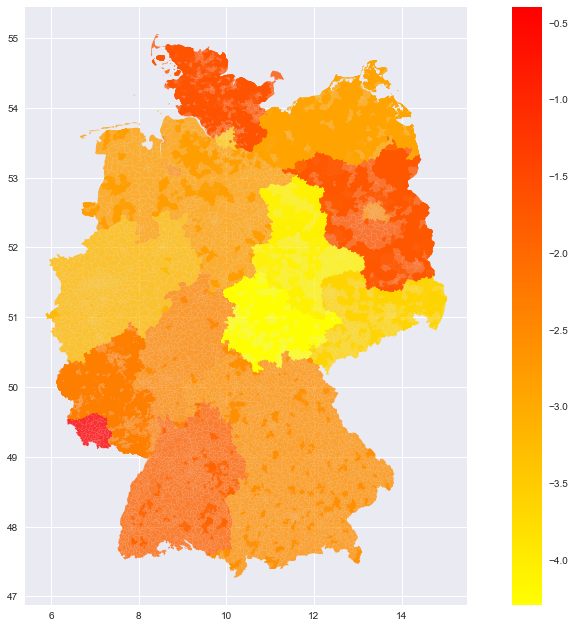

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

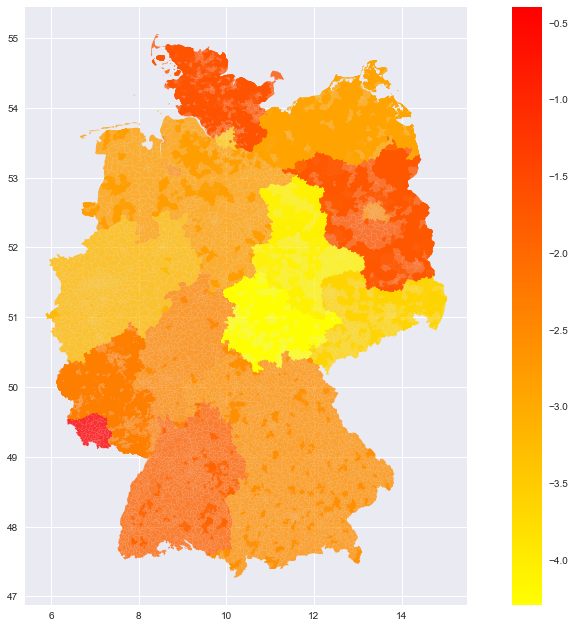

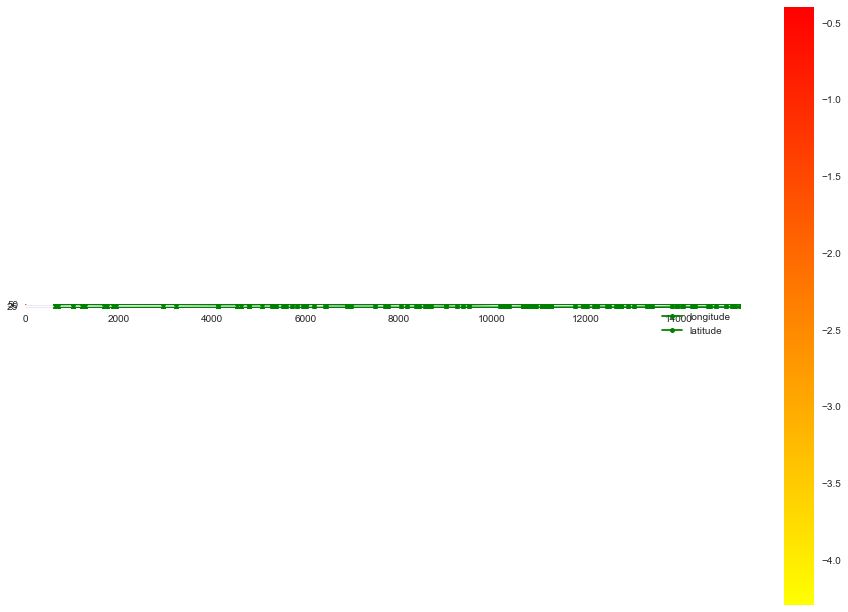

ValueError: Map is not a valid plot kind